In [3]:
import pandas as pd

file_path = '/content/USA_cars_datasets.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Display information about the dataframe
print(df.info())

   Unnamed: 0  price      brand    model  year   title_status   mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1           1   2899       ford       se  2011  clean vehicle  190552.0   
2           2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3           3  25000       ford     door  2014  clean vehicle   64146.0   
4           4  27700  chevrolet     1500  2018  clean vehicle    6654.0   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
D

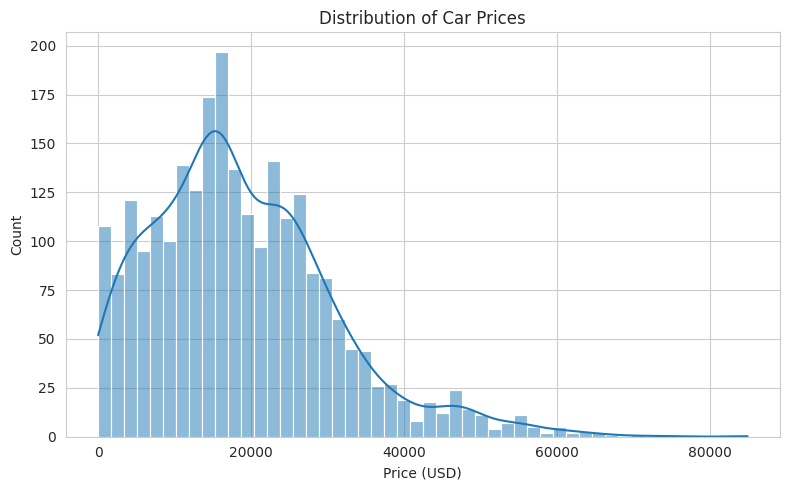

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8,5))
# Change 'Price' to 'price' to match the actual column name
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

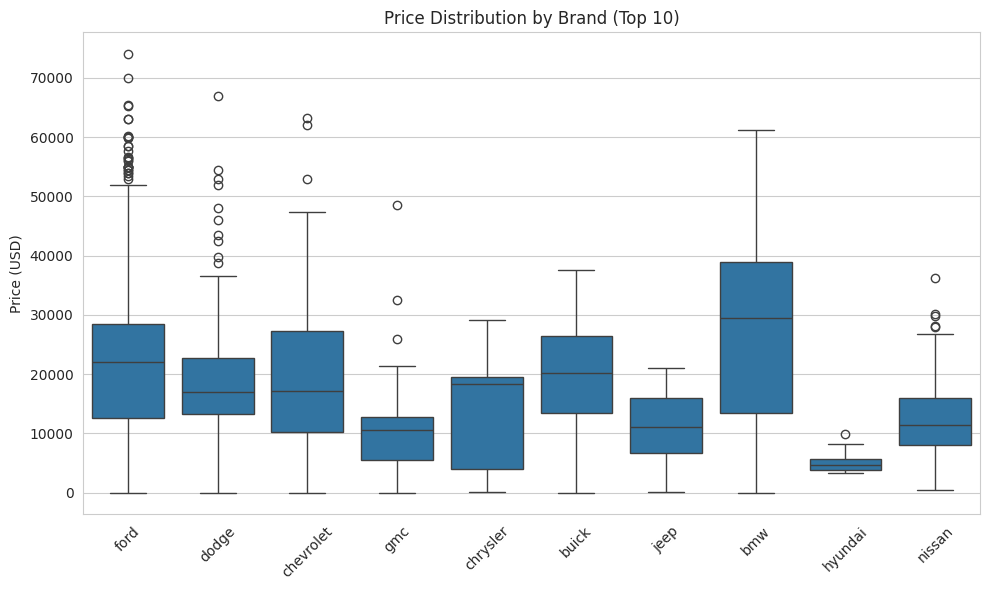

In [8]:
# Grab 10 most-common brands
# Corrected column name from 'Brand' to 'brand' based on potential case sensitivity
top_brands = (df['brand']
              .value_counts()
              .head(10)
              .index)

plt.figure(figsize=(10,6))
# Corrected column name from 'Brand' to 'brand'
sns.boxplot(data=df[df['brand'].isin(top_brands)],
            x='brand', y='price') # Also ensuring 'price' is lowercase as used in the previous plot
plt.title("Price Distribution by Brand (Top 10)")
plt.xlabel("")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
!pip -q install plotly  # run once in Colab / local env

import plotly.express as px

fig = px.scatter(df,
                 x="mileage", # Changed from "Mileage" to "mileage"
                 y="price",   # Changed from "Price" to "price"
                 color="condition",  # points coloured by vehicle condition (assuming condition is also lowercase)
                 hover_data=["brand", "model", "year"], # Assuming these are lowercase as well based on previous corrections
                 title="Price vs Mileage (coloured by Condition)",
                 labels={"mileage":"Mileage (mi)", "price":"Price (USD)"}) # Update labels to match the corrected column names
fig.update_traces(marker=dict(opacity=0.7))
fig.show()

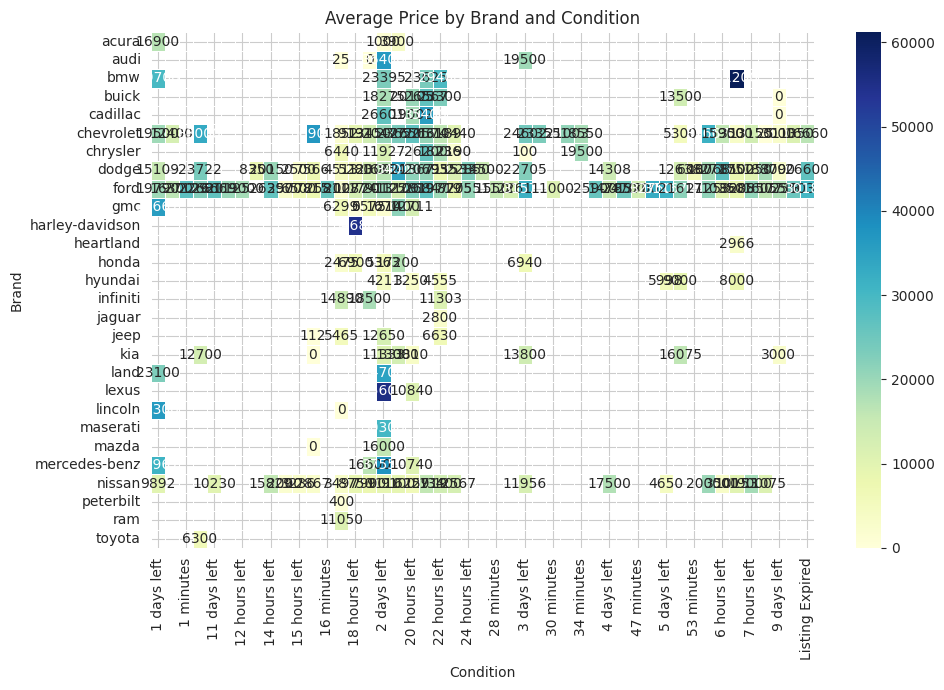

In [14]:
pivot = (df
         .groupby(['brand', 'condition'])['price']  # Corrected column names to lowercase
         .mean()
         .unstack())  # rows: Brand, columns: Condition

plt.figure(figsize=(10,7))
sns.heatmap(pivot,
            annot=True, fmt=".0f",
            cmap="YlGnBu",
            linewidths=.5)
plt.title("Average Price by Brand and Condition")
plt.xlabel("Condition")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

### Key Insights
- **Price spread**: Median price clusters between \$ X–Y, but heavy right tail shows premium cars.
- **Brands**: Brand A commands the highest median; Brand B shows widest IQR ➜ greater variability.
- **Mileage effect**: Clear negative trend—every 10 k miles drops price by roughly \$ N (see scatter).
- **Condition premium**: Heatmap reveals “Excellent” condition cars fetch ~25 % more across brands.
